In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import export_graphviz# Export as dot file
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


In [3]:
petrol_data =  pd.read_csv('E:/Users/nelod/petrol_consumption.csv')

In [4]:
petrol_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
petrol_data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


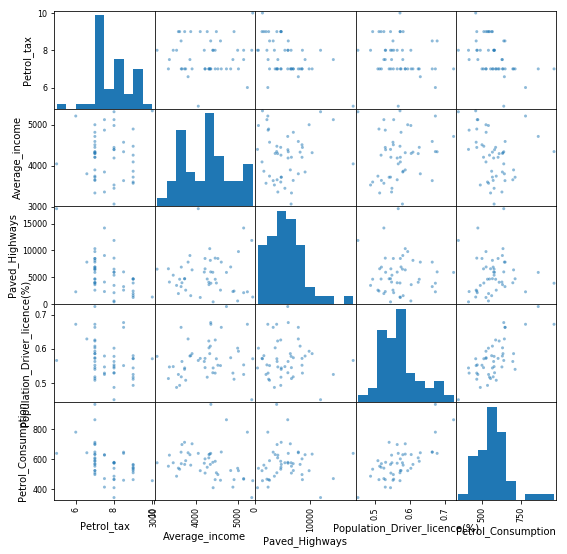

In [6]:
tmp = pd.plotting.scatter_matrix(petrol_data, figsize=(9,9))

In [8]:
X = petrol_data.drop('Petrol_Consumption', axis =1)
y = petrol_data['Petrol_Consumption']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = None)

In [45]:
regressor = RandomForestRegressor()

pipe = Pipeline([('scaler',StandardScaler()),('reduce_dim',PCA()),('regressor',regressor)])
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

In [46]:
results = pd.DataFrame({'Actual':y_test.values,'Predicted':y_pred})
print(results)

   Actual  Predicted
0     704      622.4
1     566      528.7
2     865      865.3
3     460      530.8
4     547      531.1
5     628      606.8
6     467      405.4
7     640      671.6
8     574      539.9
9     577      602.6


In [66]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:    \t{}".format(mae))
print("Mean Square Error:      \t{}".format(mse))
print("Root Mean Square Error: \t{}".format(rmse))

Mean Absolute Error:    	38.0
Mean Square Error:      	2037.6120000000003
Root Mean Square Error: 	45.13991581737831


In [25]:
#the current RF can predict the value of Petrol_Consumption with an error of 45.13 points.

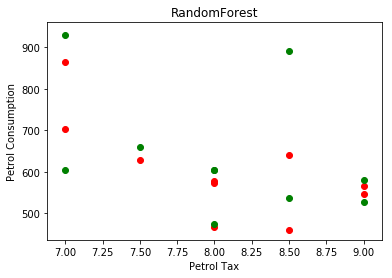

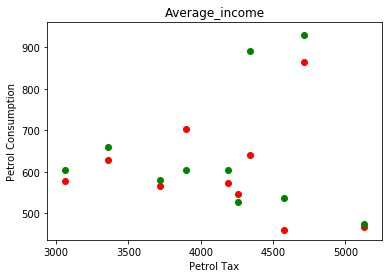

In [38]:
plt.scatter(X_test['Petrol_tax'], y_test, color = 'red')
plt.scatter(X_test['Petrol_tax'], y_pred, color = 'green')
plt.title('RandomForest')
plt.xlabel('Petrol Tax')
plt.ylabel('Petrol Consumption')
plt.show()

plt.scatter(X_test['Average_income'], y_test, color = 'red')
plt.scatter(X_test['Average_income'], y_pred, color = 'green')
plt.title('Average_income')
plt.xlabel('Petrol Tax')
plt.ylabel('Petrol Consumption')
plt.show()

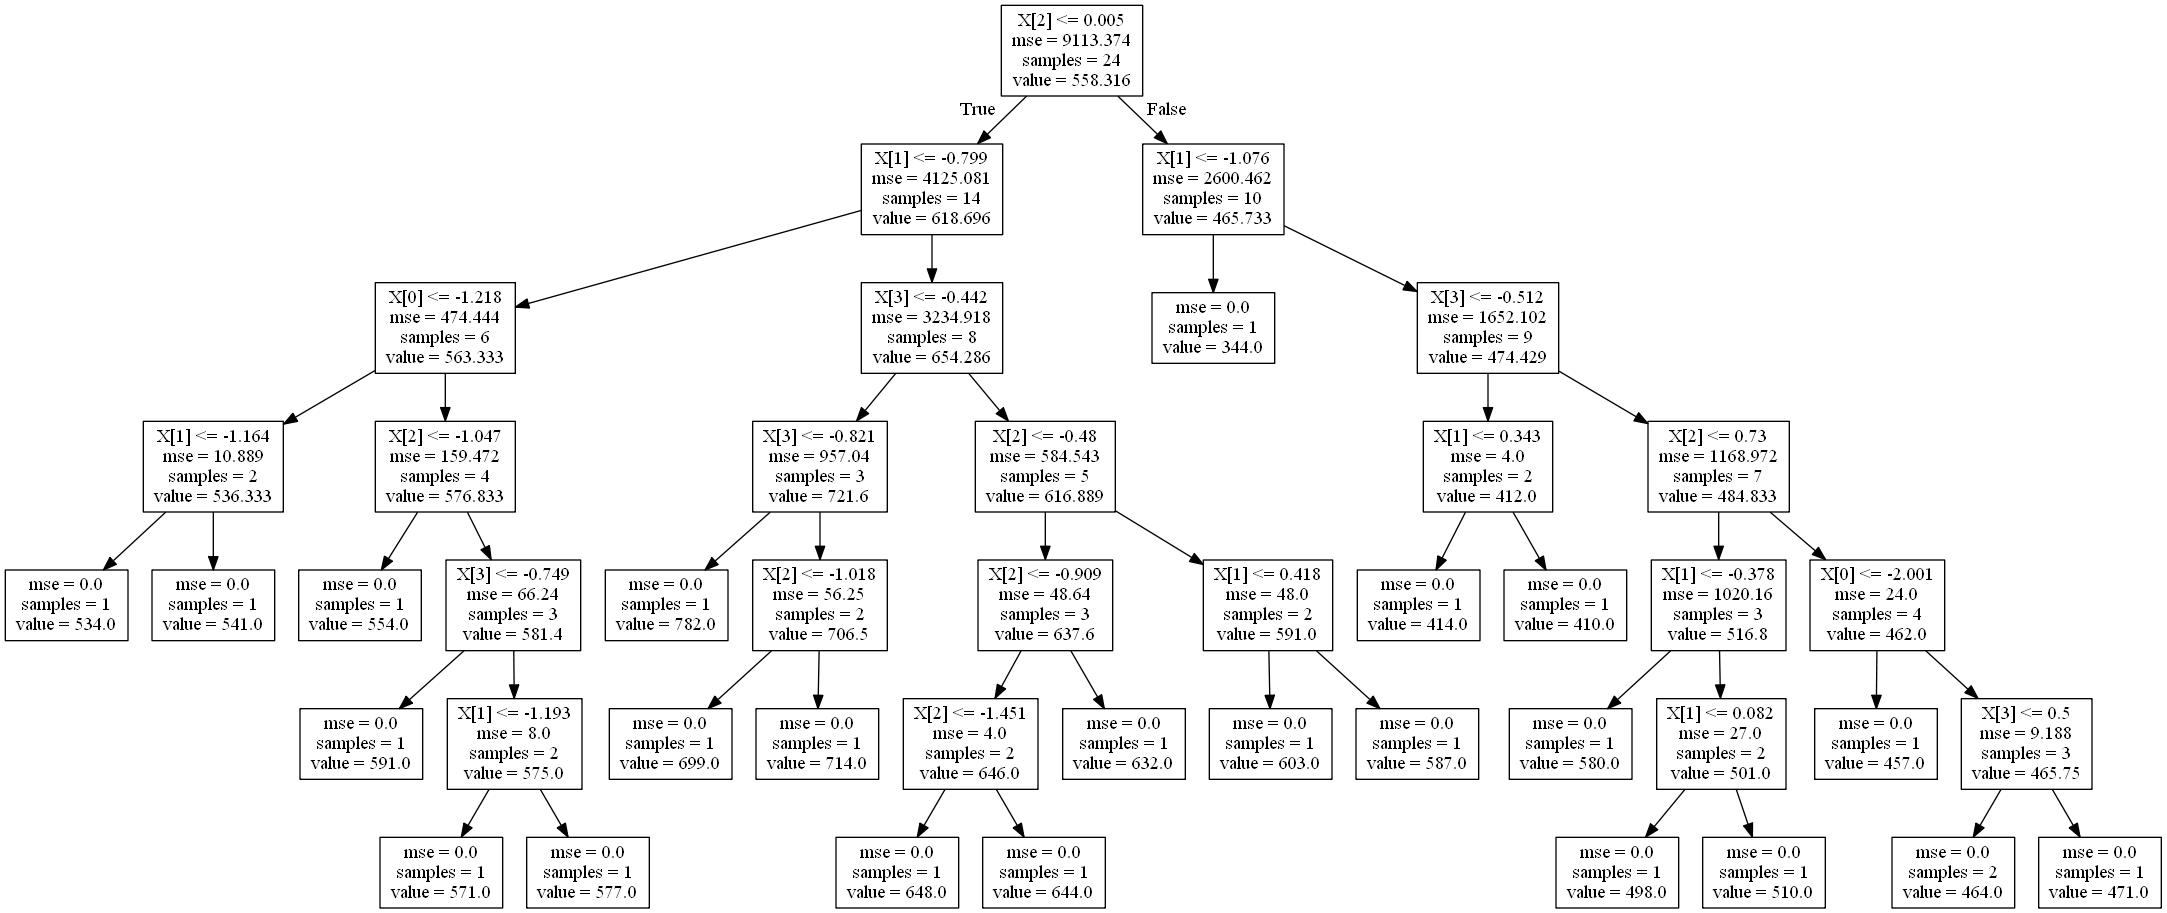

In [65]:

from IPython.display import SVG
from graphviz import Source

graph = Source(export_graphviz(pipe.named_steps['regressor'].estimators_[0], 
                out_file=None))

#SVG(graph.pipe(format='svg'))

png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

# Convert to png
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
#Image(filename = 'tree.png')